In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms 
from torch import nn, optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

In [3]:
trainset = datasets.MNIST(root = './MNIST_TRAINSET', download = True, train = True, transform =transform)
valset = datasets.MNIST(root = './MNIST_TRAINSET', download = True, train = False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
valloader = torch.utils.data.DataLoader(valset, batch_size = 64, shuffle = True)

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


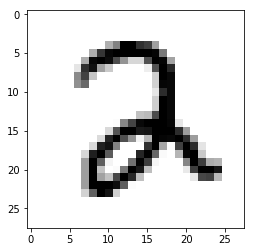

In [5]:
plt.imshow(images[0].numpy().squeeze(), cmap = 'gray_r')

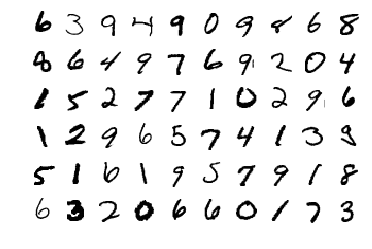

In [6]:
figure = plt.figure()
num_of_images = 60
for index in range (1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap = 'binary')

In [7]:
images.shape

torch.Size([64, 1, 28, 28])

In [8]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), nn.ReLU(),
                     nn.Linear(hidden_sizes[0], hidden_sizes[1]), nn.ReLU(),
                     nn.Linear(hidden_sizes[1], output_size),
                     nn.LogSoftmax(dim = 1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [9]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [10]:
print('Before backward pass:\n', model[0].weight.grad)

loss.backward()

print('After backward pass:\n', model[0].weight.grad)

Before backward pass:
 None
After backward pass:
 tensor([[ 2.1541e-03,  2.1541e-03,  2.1541e-03,  ...,  2.1541e-03,
          2.1541e-03,  2.1541e-03],
        [-7.7134e-04, -7.7134e-04, -7.7134e-04,  ..., -7.7134e-04,
         -7.7134e-04, -7.7134e-04],
        [ 2.3984e-05,  2.3984e-05,  2.3984e-05,  ...,  2.3984e-05,
          2.3984e-05,  2.3984e-05],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-5.4579e-04, -5.4579e-04, -5.4579e-04,  ..., -5.4579e-04,
         -5.4579e-04, -5.4579e-04]])


In [11]:
optimizer = optim.SGD(model.parameters(), lr = 0.003, momentum = 0.9)
time0 = time()
epochs = 15

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:  
        images = images.view(images.shape[0], -1) #flatten MNIST images into a 784 long vector
        optimizer.zero_grad() #Training pass 
        output = model(images)
        loss = criterion(output, labels)
        loss.backward() #this is where the model learns by back propagation
        
        optimizer.step() #the weights are optimized here 
        
        running_loss += loss.item()
        
    else:
        print('Epoch{} - Training loss: {}'.format(e, running_loss/len(trainloader)))
        
print('\nTraining Time (in minutes) =', (time() - time0)/60)

         
        

Epoch0 - Training loss: 0.6455021281041571
Epoch1 - Training loss: 0.2792994685328083
Epoch2 - Training loss: 0.21497018388244135
Epoch3 - Training loss: 0.17402107584705231
Epoch4 - Training loss: 0.14637158430223143
Epoch5 - Training loss: 0.12464327274609222
Epoch6 - Training loss: 0.10957594743685554
Epoch7 - Training loss: 0.09789817404152869
Epoch8 - Training loss: 0.08757447518471843
Epoch9 - Training loss: 0.07807618683414545
Epoch10 - Training loss: 0.071790912536098
Epoch11 - Training loss: 0.06508461323612408
Epoch12 - Training loss: 0.06016402248380535
Epoch13 - Training loss: 0.0555952675164
Epoch14 - Training loss: 0.050920864547302984

Training Time (in minutes) = 16.13542459011078


Predicted Digit = 0


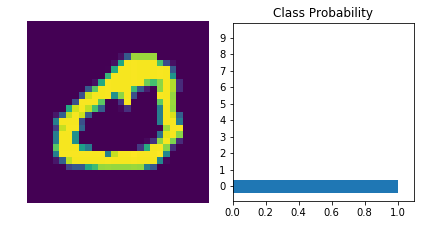

In [20]:
def view_classify (img, ps):
    '''Function for viewing an image and its predicted class'''
    ps.data.numpy().squeeze()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9))
    ax1.imshow(img.resize(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps[0])
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    

images, labels = next(iter(valloader))

img = images[0].view(1, 784)

with torch.no_grad():
    logps =model(img)
    
ps = torch.exp(logps)

probab = list(ps.numpy()[0])

print('Predicted Digit =',probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [53]:
correct_count, all_count = 0, 0
real_label = []
label_pred = []
probab_list = []
images_list = []
for images, labels in valloader:
    
    
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        images_list.append(img)
        with torch.no_grad():
            logps = model(img)
            
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        real_label.append(true_label)
        label_pred.append(pred_label)
        probab_list.append(probab)
        if true_label == pred_label:
            correct_count += 1
        all_count += 1
        
print('Number of images tested =', all_count)
print('\nModel Accuracy =', correct_count/all_count)

Number of images tested = 10000

Model Accuracy = 0.9732


In [25]:
torch.save(model, './my_mnist_model.pt')

Text(80.90000000000006, 0.5, 'Predicted Label')

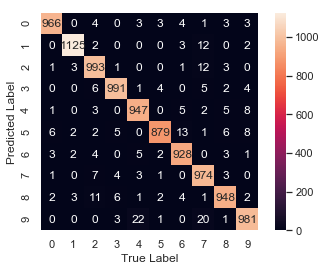

In [39]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix 
mat = confusion_matrix(real_label, label_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = 'false', xticklabels = np.arange(10), yticklabels = np.arange(10))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

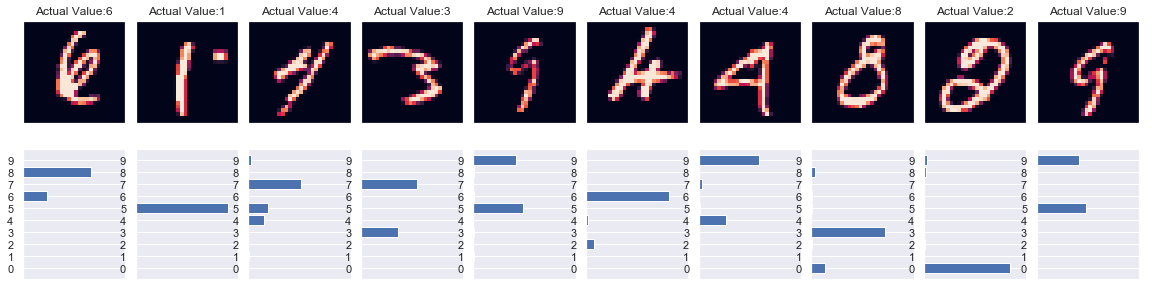

In [104]:
#Plotting some of the samples the model got wrong

real_np = np.asarray(real_label)
pred_np = np.asarray(label_pred)

neg = real_np.reshape(-1, 1) != pred_np.reshape(-1, 1)
neg_indices = [i for i, x in enumerate(neg) if x ]

fig, axes = plt.subplots(2, 10, figsize = (20, 5), subplot_kw = {'xticks' : [], 'yticks': []}, 
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))


for i in range (10):
    sample = np.random.choice(neg_indices, 1)
    image = images_list[sample[0]].view(1, 28, 28)
    axes[0, i].imshow(image.reshape(1, 28, 28).numpy().squeeze())
    axes[0, i].set_title('Actual Value:{}'.format(real_np[sample[0]], fontsize = 12, fontweight = 'bold'))
    axes[1, i].barh(np.arange(10), probab_list[sample[0]])
    axes[1, i].set_yticks(np.arange(10))
    axes[1, i].set_yticklabels(np.arange(10))
    axes[1, i].set_xlim(0, 1.1)

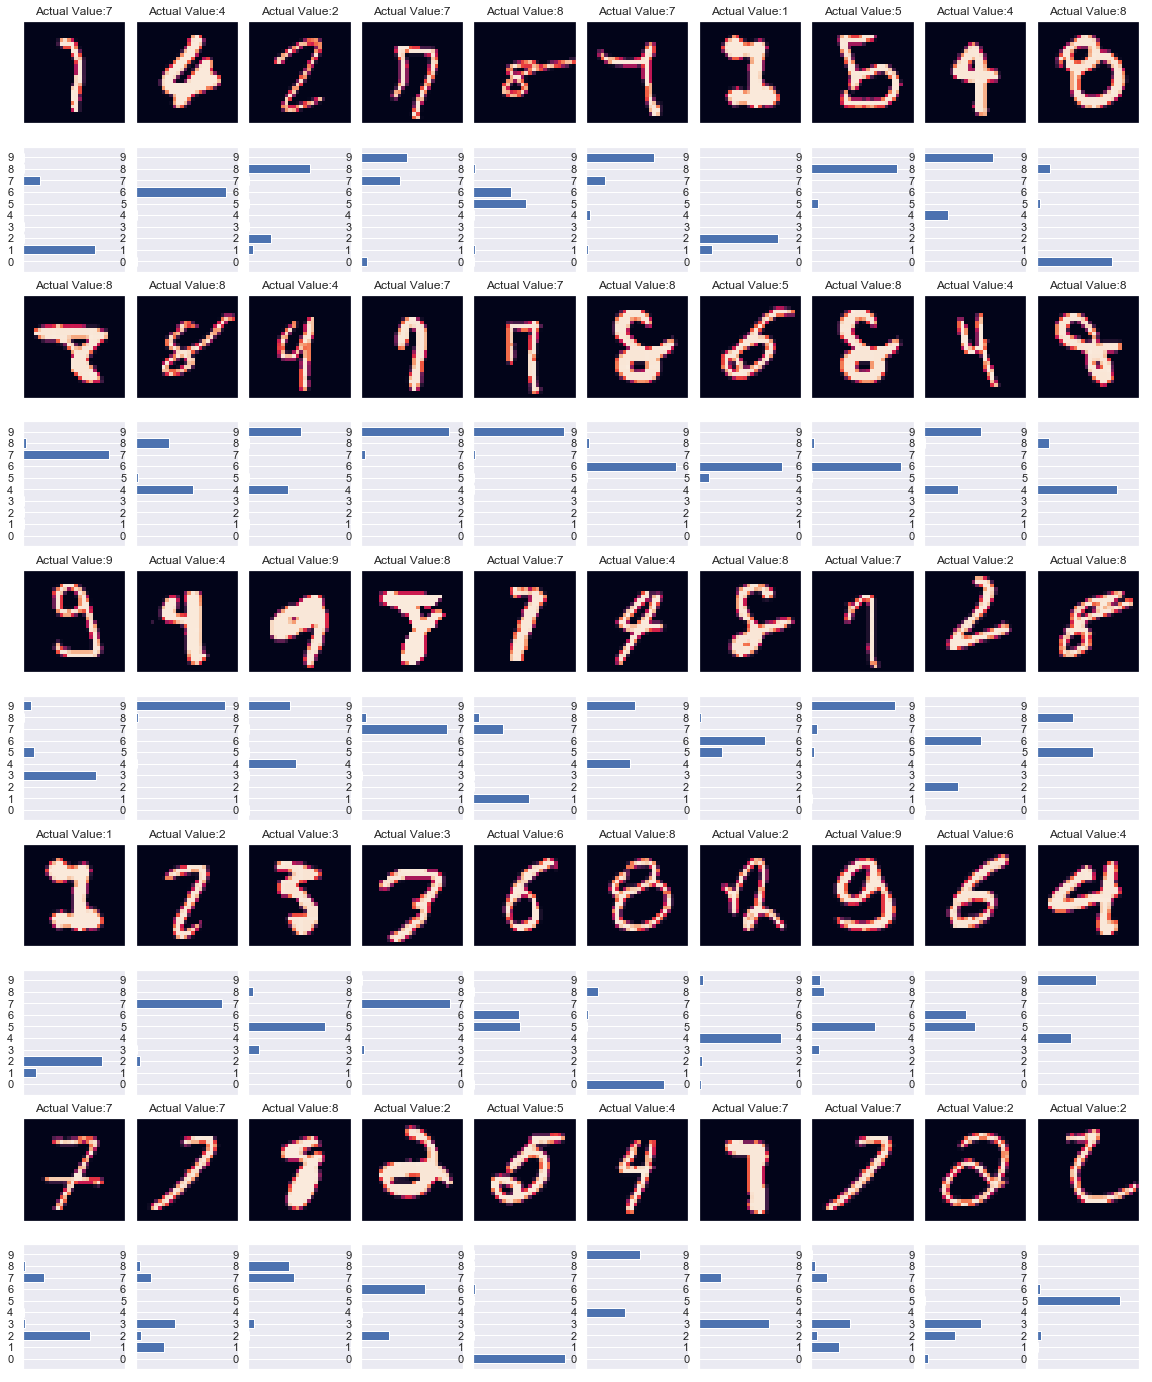

In [105]:
#Plotting some of the samples the model got wrong

real_np = np.asarray(real_label)
pred_np = np.asarray(label_pred)

neg = real_np.reshape(-1, 1) != pred_np.reshape(-1, 1)
neg_indices = [i for i, x in enumerate(neg) if x ]

fig, axes = plt.subplots(10, 10, figsize = (20, 25), subplot_kw = {'xticks' : [], 'yticks': []}, 
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for j in range(5):
    for i in range (10):
        sample = np.random.choice(neg_indices, 1)
        image = images_list[sample[0]].view(1, 28, 28)
        axes[2*j, i].imshow(image.reshape(1, 28, 28).numpy().squeeze())
        axes[2*j, i].set_title('Actual Value:{}'.format(real_np[sample[0]], fontsize = 12, fontweight = 'bold'))
        axes[2*j + 1, i].barh(np.arange(10), probab_list[sample[0]])
        axes[2*j + 1, i].set_yticks(np.arange(10))
        axes[2*j + 1, i].set_yticklabels(np.arange(10))
        axes[2*j + 1, i].set_xlim(0, 1.1)